|평가문항	|상세기준|내 평가|
|---|---|--|
|1. 프로젝트 1의 회귀모델 예측정확도가 기준 이상 높게 나왔는가?|MSE 손실함수값 3000 이하를 달성|2819|
|2. 프로젝트 2의 회귀모델 예측정확도가 기준 이상 높게 나왔는가?|RMSE 값 150 이하를 달성|147|
|3. 시각화 요구사항이 정확하게 이루어졌는가?|각 프로젝트 진행 과정에서 요구하고 있는 데이터개수 시각화 및 예측결과 시각화를 모두 진행하였다.|Done|

# Project 1 : Diabetes

- 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!    
https://yhyun225.tistory.com/11  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html  
(1) 데이터 가져오기  
(2) 모델에 입력할 데이터 X 준비하기  
(3) 모델에 예측할 데이터 y 준비하기  
(4) train 데이터와 test 데이터로 분리하기  
(5) 모델 준비하기  
(6) 손실함수 loss 정의하기   
(7) 기울기를 구하는 gradient 함수 구현하기  
(8) 하이퍼 파라미터인 학습률 설정하기  
(9) 모델 학습하기  
(10) test 데이터에 대한 성능 확인하기  
(11) 정답 데이터와 예측한 데이터 시각화하기  

In [95]:
#import library
import pandas as pd
import numpy as np

##1-1. Load dataset & Prepare X & y

- feature of dataset
    - age age in years
    - sex
    - bmi body mass index
    - bp average blood pressure
    - s1 tc, total serum cholesterol
    - s2 ldl, low-density lipoproteins
    - s3 hdl, high-density lipoproteins
    - s4 tch, total cholesterol / HDL
    - s5 ltg, possibly log of serum triglycerides level
    - s6 glu, blood sugar level

In [96]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df_X = diabetes.data
df_y = diabetes.target
print(df_X.shape)
print(df_y.shape)
type(df_X), type(df_y)

(442, 10)
(442,)


(numpy.ndarray, numpy.ndarray)

- chatGPT에게 물어봐 
- Numpy array & numpy.ndarray  
Numpy array와 np.ndarray는 사실상 동일한 것을 가리키는 것으로, 서로 바꿔서 사용해도 무방합니다. Numpy는 배열을 다루는 라이브러리로, np.ndarray는 N-dimensional array의 약자입니다. Numpy array는 Numpy 라이브러리에서 제공하는 배열 객체를 의미하며, np.ndarray는 Numpy array의 데이터 타입을 나타내는 클래스입니다. 따라서, np.ndarray는 Numpy array의 구체적인 데이터 타입을 나타내는 것이고, Numpy array는 그 데이터 타입을 가진 배열 객체를 의미합니다. 
</br>
보통은 Numpy array를 사용하는 것이 자연스러운 표현이며, np.ndarray는 주로 데이터 타입을 지정하거나, 다른 함수에서 반환된 배열의 데이터 타입을 확인하는 등의 용도로 사용됩니다. 예를 들어, 다음과 같은 코드에서는 np.ndarray를 사용하여 데이터 타입을 확인하고 있습니다.

In [97]:
df_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [98]:
df_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

- unavailable visualization because no. of features is over 3


##1-2. Split

In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(df_X, df_y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(353, 10) (353,) (89, 10) (89,)


##1-3. Prepare Model : W, b, Define function of model

In [100]:
import numpy as np
W = np.random.rand(10)  #변수 특성값의 개수가 10개이므로 10개를 랜덤으로 정함. 이게 운좋게 잘 정해지면 빠르게 최적 값을 구하는 거 같음. 
b = np.random.rand() 
W, b

(array([0.22761464, 0.42063091, 0.92359107, 0.63819313, 0.94378864,
        0.81447789, 0.38611624, 0.71629289, 0.60558393, 0.01644502]),
 0.6743169642440779)

In [101]:
#모델함수 
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]  #같은 열의 변수와 가중치를 곱해서 계속 더해주고 있음. 시그마(x*w)를 하고 있는 거임. for문이 끝나면 전체 X에 대한 예측값이 한꺼번에 나오는 거임. 
    predictions += b  #시그마(x*w) + bias
    # print(predictions.shape) # 442의 예측값이므로 442x1의 행렬이겠지

    return predictions

print('<3')

<3


##1-4. Loss function (MSE)

In [102]:
#Define MSE
def MSE(a, b):
    mse = 0
    mse = ((a - b) ** 2).mean()  # return mean(avrage) of a, b == list 
    return mse
print('<3')

#Define loss
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L
print('<3')

<3
<3


##1-5 Gradient function

In [103]:
#Define gradient function
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    # print('N : ',N)  #442이겠지

    # y_pred 준비
    y_pred = model(X, W, b)
        
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)    #https://coding-grandpa.tistory.com/33 T : 행열을 바꿔주는 함수, dot : 두 행렬을 곱하는 함수
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

print('<3')

<3


In [104]:
dW, db = gradient(df_X, W, b, df_y)
print("dW:", dW)
print("db:", db)

dW: [-1.37007891 -0.31079071 -4.28642671 -3.22541605 -1.54024923 -1.26271487
  2.88694898 -3.14157921 -4.13439721 -2.79377077]
db: -302.9183343973037


##1-6. Learning Rate

In [105]:
LEARNING_RATE = 0.9 #1부터 0.0001까지 해봄.

In [106]:
#손실함수
losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))  #2892

Iteration 10 : Loss 5703.1938
Iteration 20 : Loss 4962.2631
Iteration 30 : Loss 4597.7679
Iteration 40 : Loss 4319.0761
Iteration 50 : Loss 4101.6933
Iteration 60 : Loss 3929.9468
Iteration 70 : Loss 3792.4269
Iteration 80 : Loss 3680.7860
Iteration 90 : Loss 3588.8957
Iteration 100 : Loss 3512.2378
Iteration 110 : Loss 3447.4648
Iteration 120 : Loss 3392.0816
Iteration 130 : Loss 3344.2152
Iteration 140 : Loss 3302.4483
Iteration 150 : Loss 3265.6981
Iteration 160 : Loss 3233.1289
Iteration 170 : Loss 3204.0880
Iteration 180 : Loss 3178.0593
Iteration 190 : Loss 3154.6295
Iteration 200 : Loss 3133.4631
Iteration 210 : Loss 3114.2840
Iteration 220 : Loss 3096.8622
Iteration 230 : Loss 3081.0037
Iteration 240 : Loss 3066.5430
Iteration 250 : Loss 3053.3372
Iteration 260 : Loss 3041.2624
Iteration 270 : Loss 3030.2096
Iteration 280 : Loss 3020.0827
Iteration 290 : Loss 3010.7963
Iteration 300 : Loss 3002.2742
Iteration 310 : Loss 2994.4482
Iteration 320 : Loss 2987.2568
Iteration 330 : L

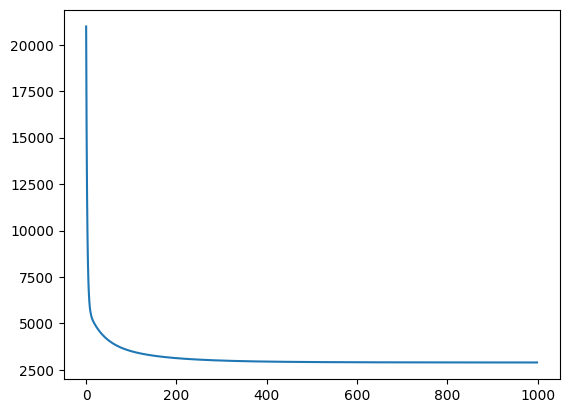

In [107]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [108]:
W, b

(array([  39.63317791, -234.50080904,  547.24707346,  339.34390811,
         -94.24687837, -128.333337  , -217.00681379,  147.82490405,
         407.19440639,   76.68826272]),
 151.3062203759971)

##1-7. Verify performance of test data

In [109]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2878.6830158590155

##1-8. Visualization of predicted and real data
- x축에는 X 데이터의 첫 번째 컬럼을, y축에는 정답인 target 데이터를 넣어서 모델이 예측한 데이터를 시각화
- 첫번째 컬럼은 age

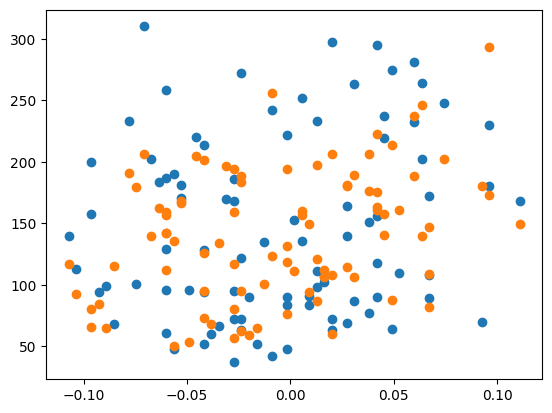

In [110]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show() # 잘 섞여 있군

##1-9. Various Combinations of features
- feature of dataset
    - age age in years
    - sex
    - bmi body mass index
    - bp average blood pressure
    - s1 tc, total serum cholesterol
    - s2 ldl, low-density lipoproteins
    - s3 hdl, high-density lipoproteins
    - s4 tch, total cholesterol / HDL
    - s5 ltg, possibly log of serum triglycerides level
    - s6 glu, blood sugar level  
</br>
- 다 중요해 보이는 데 뭘 뺀단 말인가..   
    - 변수와 타겟 사이의 그래프를 그려보면 어떤 걸 제외할 지 보이겠지 
    - 상관관계가 있어 보이는 거 없어 보이는 거 빼서 MSE 결과 비교해보자... => bmi, bp, tch, ltg, glu에서 target과 상관관계가 보임.



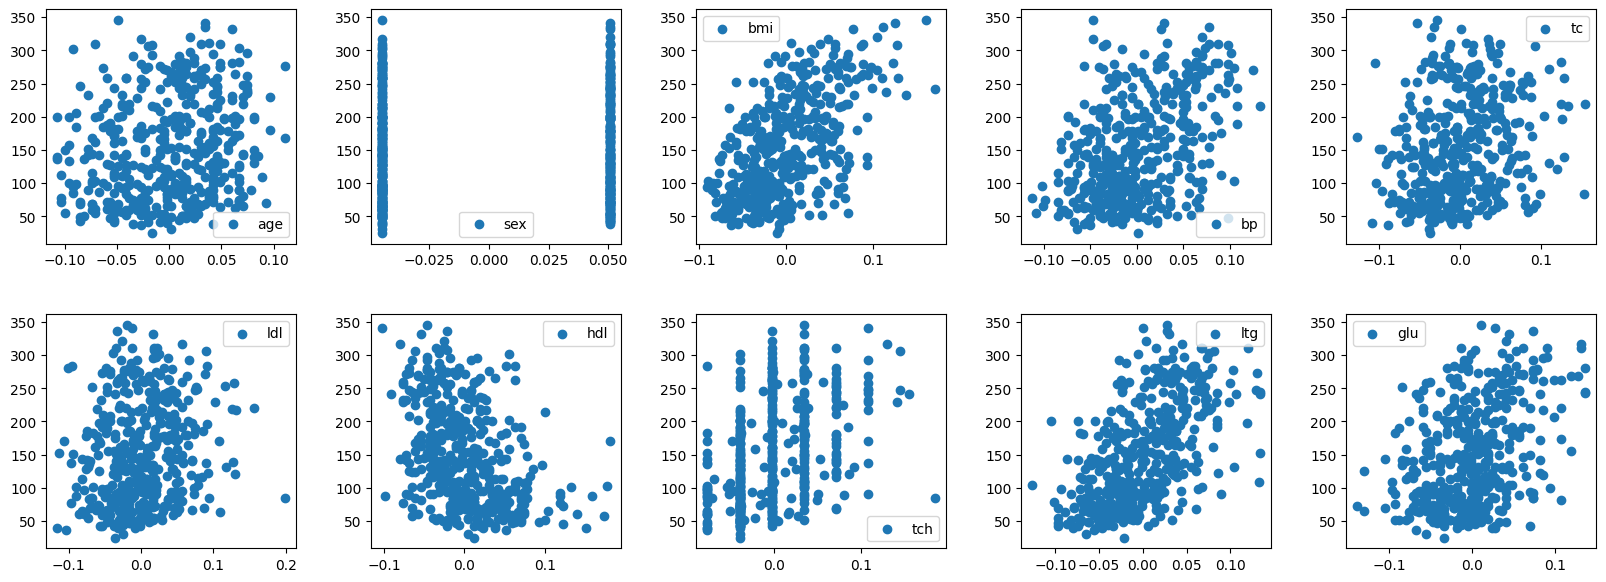

In [111]:
#변수와 타겟 간의 상관 관계를 보자.
#visualization of DATA
import matplotlib.pyplot as plt
# 실행한 브라우저에서 바로 그림을 볼 수 있게 해줌
# %matplotlib inline 
# %config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.
fig, ax = plt.subplots(2,5)
fig.set_size_inches((20,7))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

j=0
for i in ['age','sex','bmi','bp','tc','ldl','hdl', 'tch','ltg', 'glu']:
    
    plt.subplot(2,5,j+1)
    plt.scatter(df_X[:,j], df_y, label = i)

    j +=1
    
    plt.legend()
    
plt.show()
# bmi, bp, tch, ltg, glu에서 상관관계가 양의 상관관계가 보임.  그 중 bmi가 가장 큰 상관관계로 보임.

### 1-9-a. except for hdl
- Split, model, learning, loss, visualization

In [112]:
#7번째 열 빼기
df_X_1 = np.delete(df_X, 6, axis = 1)
df_X_1.shape

(442, 9)

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(df_X_1, df_y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(353, 9) (353,) (89, 9) (89,)


In [114]:
import numpy as np
W = np.random.rand(9)  #변수 특성값의 개수가 9개이므로 9개를 랜덤으로 정함. 이게 운좋게 잘 정해지면 빠르게 최적 값을 구하는 거 같음. 
b = np.random.rand() 
W, b

(array([0.73866801, 0.65946101, 0.08423548, 0.57849703, 0.4153376 ,
        0.34613284, 0.66970371, 0.56893129, 0.74691787]),
 0.5070531584958196)

In [115]:
#모델함수 
def model_1(X, W, b):
    predictions = 0
    for i in range(9):
        predictions += X[:, i] * W[i]  #같은 열의 변수와 가중치를 곱해서 계속 더해주고 있음. 시그마(x*w)를 하고 있는 거임. for문이 끝나면 전체 X에 대한 예측값이 한꺼번에 나오는 거임임
    predictions += b  #시그마(x*w) + bias
    # print(predictions.shape) # 442의 예측값이므로 442x1의 행렬이겠지

    return predictions

print('<3')

<3


In [116]:
#Define MSE
def MSE_1(a, b):
    mse = 0
    mse = ((a - b) ** 2).mean()  # return mean(avrage) of a, b == list 
    return mse
print('<3')

#Define loss
def loss_1(X, W, b, y):
    predictions = model_1(X, W, b)
    L = MSE_1(predictions, y)
    return L
print('<3')

<3
<3


In [117]:
#Define gradient function
def gradient_1(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    # print('N : ',N)  #442이겠지

    # y_pred 준비
    y_pred = model_1(X, W, b)
        
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)    #https://coding-grandpa.tistory.com/33 T : 행열을 바꿔주는 함수, dot : 두 행렬을 곱하는 함수
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

print('<3')

<3


In [118]:
dW, db = gradient_1(df_X, W, b, df_y)
print("dW:", dW)
print("db:", db)

dW: [-1.36954041 -0.31072235 -4.29144918 -3.22730341 -1.54490526 -1.26786915
  2.88964111 -3.1463353  -4.13763565 -2.79623111]
db: -303.2528620088002


In [119]:
LEARNING_RATE = 0.9 #1부터 0.0001까지 해봄.

In [120]:
#손실함수
losses = []

for i in range(1, 1001):
    dW, db = gradient_1(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss_1(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))  

Iteration 10 : Loss 5761.9574
Iteration 20 : Loss 5053.8571
Iteration 30 : Loss 4707.9410
Iteration 40 : Loss 4438.3636
Iteration 50 : Loss 4224.1599
Iteration 60 : Loss 4051.9776
Iteration 70 : Loss 3911.9116
Iteration 80 : Loss 3796.5756
Iteration 90 : Loss 3700.4430
Iteration 100 : Loss 3619.3628
Iteration 110 : Loss 3550.2026
Iteration 120 : Loss 3490.5859
Iteration 130 : Loss 3438.6983
Iteration 140 : Loss 3393.1446
Iteration 150 : Loss 3352.8428
Iteration 160 : Loss 3316.9466
Iteration 170 : Loss 3284.7872
Iteration 180 : Loss 3255.8306
Iteration 190 : Loss 3229.6453
Iteration 200 : Loss 3205.8789
Iteration 210 : Loss 3184.2403
Iteration 220 : Loss 3164.4859
Iteration 230 : Loss 3146.4100
Iteration 240 : Loss 3129.8369
Iteration 250 : Loss 3114.6153
Iteration 260 : Loss 3100.6135
Iteration 270 : Loss 3087.7162
Iteration 280 : Loss 3075.8215
Iteration 290 : Loss 3064.8392
Iteration 300 : Loss 3054.6888
Iteration 310 : Loss 3045.2982
Iteration 320 : Loss 3036.6023
Iteration 330 : L

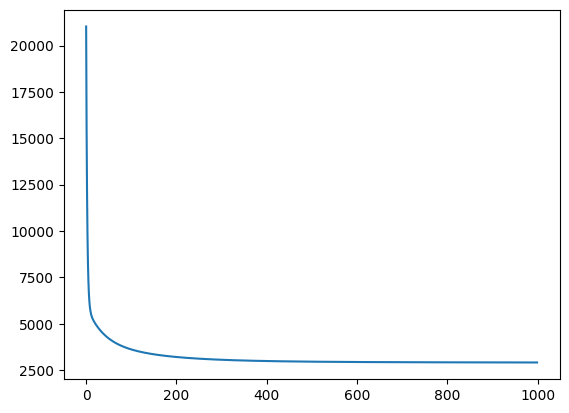

In [121]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [122]:
W, b

(array([  29.69531335, -205.24603998,  573.40210001,  330.59305976,
        -206.29155217, -114.80849893,  308.03381278,  431.50194145,
          83.57150395]),
 151.340482789757)

In [123]:
prediction = model_1(X_test, W, b)
mse = loss_1(X_test, W, b, y_test)
mse # MSE가 다르지 않음. 오캄의 면도날 이론에 따르면 결과가 같으면 더 적은 피쳐를 선택하는 것이 맞음.

2877.943216218887

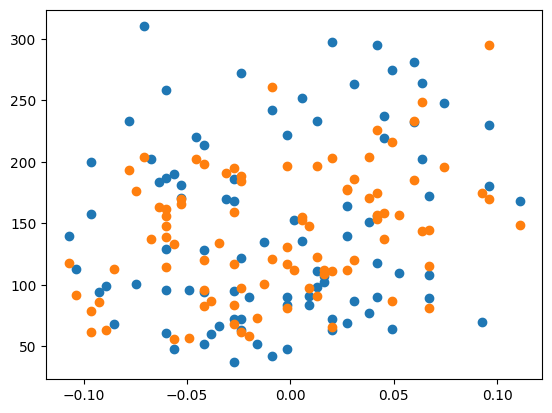

In [124]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show() # 잘 섞여 있군 여기도 첫번째 컬럼은 age

### 1-9-b. except for hdl, age, tc, ldl
- Split, model, learning, loss, visualization

In [125]:
#1,5,6번째 열 빼기
df_X_3 = np.delete(df_X_1, 5, axis = 1)
df_X_3 = np.delete(df_X_3, 4, axis = 1)
df_X_3 = np.delete(df_X_3, 0, axis = 1) #한꺼번에 어떻게 뺌? 앞에서부터 빼면 열 번호가 달라지니 뒤에서부터 뺐음.
df_X_3.shape

(442, 6)

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(df_X_3, df_y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(353, 6) (353,) (89, 6) (89,)


In [127]:
import numpy as np
W = np.random.rand(6)  #변수 특성값의 개수가 9개이므로 9개를 랜덤으로 정함. 이게 운좋게 잘 정해지면 빠르게 최적 값을 구하는 거 같음. 
b = np.random.rand() 
W, b

(array([0.37666978, 0.894174  , 0.81219991, 0.5146504 , 0.75155592,
        0.49441399]),
 0.8774912359904203)

In [128]:
#모델함수 
def model_1(X, W, b):
    predictions = 0
    for i in range(6):
        predictions += X[:, i] * W[i]  #같은 열의 변수와 가중치를 곱해서 계속 더해주고 있음. 시그마(x*w)를 하고 있는 거임. for문이 끝나면 전체 X에 대한 예측값이 한꺼번에 나오는 거임임
    predictions += b  #시그마(x*w) + bias
    # print(predictions.shape) # 442의 예측값이므로 442x1의 행렬이겠지

    return predictions

print('<3')

<3


In [129]:
#Define MSE
def MSE_1(a, b):
    mse = 0
    mse = ((a - b) ** 2).mean()  # return mean(avrage) of a, b == list 
    return mse
print('<3')

#Define loss
def loss_1(X, W, b, y):
    predictions = model_1(X, W, b)
    L = MSE_1(predictions, y)
    return L
print('<3')

<3
<3


In [130]:
#Define gradient function
def gradient_1(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    # print('N : ',N)  #442이겠지

    # y_pred 준비
    y_pred = model_1(X, W, b)
        
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)    #https://coding-grandpa.tistory.com/33 T : 행열을 바꿔주는 함수, dot : 두 행렬을 곱하는 함수
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

print('<3')

<3


In [131]:
dW, db = gradient_1(df_X, W, b, df_y)
print("dW:", dW)
print("db:", db)

dW: [-1.37115046 -0.30978762 -4.28938537 -3.22754137 -1.5457123  -1.26741424
  2.88836948 -3.14618491 -4.13932864 -2.7964614 ]
db: -302.511985853811


In [132]:
LEARNING_RATE = 0.9 #1부터 0.0001까지 해봄.

In [133]:
#손실함수
losses = []

for i in range(1, 1001):
    dW, db = gradient_1(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss_1(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))  

Iteration 10 : Loss 5791.1277
Iteration 20 : Loss 5091.5758
Iteration 30 : Loss 4739.3961
Iteration 40 : Loss 4457.4065
Iteration 50 : Loss 4229.1650
Iteration 60 : Loss 4043.9265
Iteration 70 : Loss 3893.1516
Iteration 80 : Loss 3770.0302
Iteration 90 : Loss 3669.1283
Iteration 100 : Loss 3586.1079
Iteration 110 : Loss 3517.5034
Iteration 120 : Loss 3460.5446
Iteration 130 : Loss 3413.0152
Iteration 140 : Loss 3373.1404
Iteration 150 : Loss 3339.4972
Iteration 160 : Loss 3310.9438
Iteration 170 : Loss 3286.5621
Iteration 180 : Loss 3265.6133
Iteration 190 : Loss 3247.5013
Iteration 200 : Loss 3231.7444
Iteration 210 : Loss 3217.9525
Iteration 220 : Loss 3205.8087
Iteration 230 : Loss 3195.0548
Iteration 240 : Loss 3185.4800
Iteration 250 : Loss 3176.9112
Iteration 260 : Loss 3169.2060
Iteration 270 : Loss 3162.2467
Iteration 280 : Loss 3155.9355
Iteration 290 : Loss 3150.1907
Iteration 300 : Loss 3144.9439
Iteration 310 : Loss 3140.1373
Iteration 320 : Loss 3135.7219
Iteration 330 : L

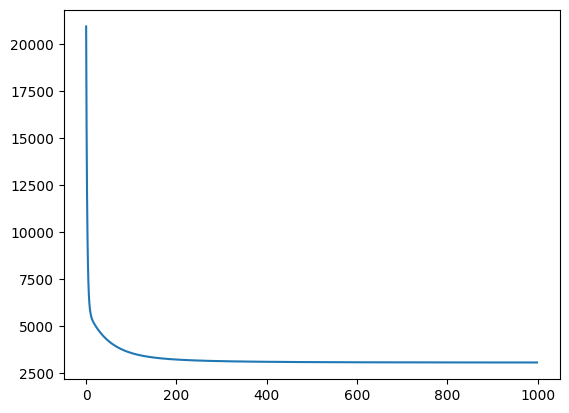

In [134]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [135]:
W, b

(array([-176.44172578,  573.63175945,  320.92613323,  174.74571119,
         388.93928498,   65.56310653]),
 151.73211819913118)

In [136]:
prediction = model_1(X_test, W, b)
mse = loss_1(X_test, W, b, y_test)
mse # MSE가 2% 감소.

2819.8481613853814

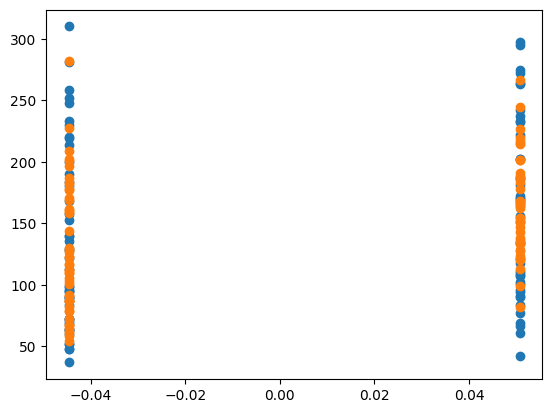

In [137]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show() # 왜 이런 모양? 첫번째가 sex이기 때문에 범주형 

### 1-9-c. except for hdl, age, tc, ldl & sex
- Split, model, learning, loss, visualization

In [138]:
#1-9-a dataset의 2번째 열 빼기
df_X_2 = np.delete(df_X_3, 0, axis = 1)

df_X_2.shape

(442, 5)

In [139]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(df_X_2, df_y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(353, 5) (353,) (89, 5) (89,)


In [140]:
import numpy as np
W = np.random.rand(5)  #변수 특성값의 개수가 8개이므로 8개를 랜덤으로 정함. 이게 운좋게 잘 정해지면 빠르게 최적 값을 구하는 거 같음. 
b = np.random.rand() 
W, b

(array([0.86871809, 0.816557  , 0.81878607, 0.73058338, 0.51028285]),
 0.22394975316970112)

In [141]:
#모델함수 
def model_2(X, W, b):
    predictions = 0
    for i in range(5):
        predictions += X[:, i] * W[i]  #같은 열의 변수와 가중치를 곱해서 계속 더해주고 있음. 시그마(x*w)를 하고 있는 거임. for문이 끝나면 전체 X에 대한 예측값이 한꺼번에 나오는 거임임
    predictions += b  #시그마(x*w) + bias
    # print(predictions.shape) # 442의 예측값이므로 442x1의 행렬이겠지

    return predictions

print('<3')

<3


In [142]:
#Define MSE
def MSE_2(a, b):
    mse = 0
    mse = ((a - b) ** 2).mean()  # return mean(avrage) of a, b == list 
    return mse
print('<3')

#Define loss
def loss_2(X, W, b, y):
    predictions = model_2(X, W, b)
    L = MSE_2(predictions, y)
    return L
print('<3')

<3
<3


In [143]:
#Define gradient function
def gradient_2(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    # print('N : ',N)  #442이겠지

    # y_pred 준비
    y_pred = model_2(X, W, b)
        
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)    #https://coding-grandpa.tistory.com/33 T : 행열을 바꿔주는 함수, dot : 두 행렬을 곱하는 함수
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

print('<3')

<3


In [144]:
dW, db = gradient_2(df_X, W, b, df_y)
print("dW:", dW)
print("db:", db)

dW: [-1.36942617 -0.30987152 -4.28944507 -3.22657015 -1.54799905 -1.27000321
  2.88853289 -3.1476517  -4.13965567 -2.79647536]
db: -303.81906881945247


In [145]:
LEARNING_RATE = 0.9 #1부터 0.0001까지 해봄.

In [146]:
#손실함수
losses = []

for i in range(1, 1001):
    dW, db = gradient_2(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss_2(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))  

Iteration 10 : Loss 5792.7285
Iteration 20 : Loss 5091.1504
Iteration 30 : Loss 4739.5786
Iteration 40 : Loss 4458.7032
Iteration 50 : Loss 4232.0754
Iteration 60 : Loss 4048.9176
Iteration 70 : Loss 3900.6291
Iteration 80 : Loss 3780.3244
Iteration 90 : Loss 3682.4898
Iteration 100 : Loss 3602.7098
Iteration 110 : Loss 3537.4480
Iteration 120 : Loss 3483.8707
Iteration 130 : Loss 3439.7077
Iteration 140 : Loss 3403.1390
Iteration 150 : Loss 3372.7055
Iteration 160 : Loss 3347.2367
Iteration 170 : Loss 3325.7936
Iteration 180 : Loss 3307.6218
Iteration 190 : Loss 3292.1156
Iteration 200 : Loss 3278.7878
Iteration 210 : Loss 3267.2464
Iteration 220 : Loss 3257.1757
Iteration 230 : Loss 3248.3209
Iteration 240 : Loss 3240.4764
Iteration 250 : Loss 3233.4758
Iteration 260 : Loss 3227.1842
Iteration 270 : Loss 3221.4920
Iteration 280 : Loss 3216.3101
Iteration 290 : Loss 3211.5657
Iteration 300 : Loss 3207.1988
Iteration 310 : Loss 3203.1606
Iteration 320 : Loss 3199.4104
Iteration 330 : L

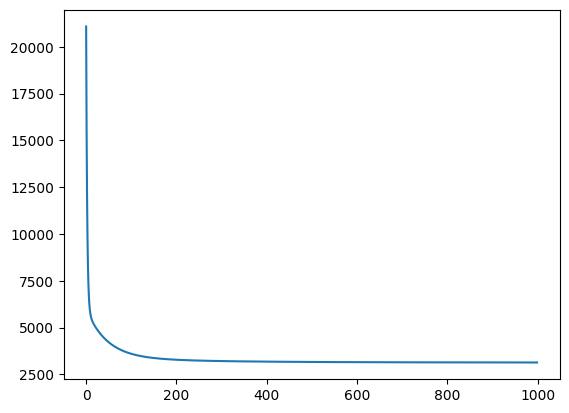

In [147]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [148]:
W, b

(array([594.9366708 , 295.91821133, 119.90458057, 401.96378639,
         54.93687843]),
 151.71711146296832)

In [149]:
prediction = model_2(X_test, W, b)
mse = loss_2(X_test, W, b, y_test)
mse # 더 커졌네 언더피팅 sex는 들어가야 하는 것이 맞는가 봄.

2908.5894106389464

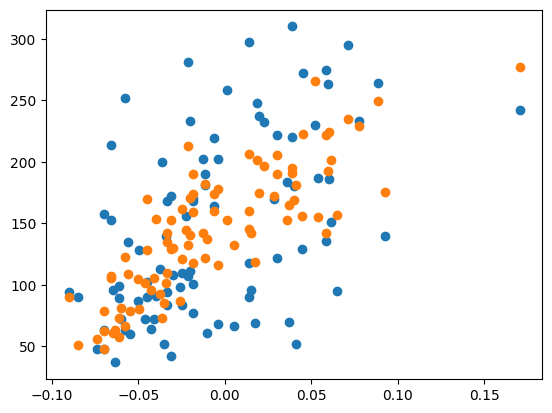

In [150]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show() # 첫번째 컬럼이이 bmi

### 1-9-d. except for hdl, age, tc, ldl & bmi
- Split, model, learning, loss, visualization

In [151]:
#1-9-a dataset의 2번째 열 빼기
df_X_4 = np.delete(df_X_3, 1, axis = 1)

df_X_4.shape

(442, 5)

In [152]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(df_X_4, df_y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(353, 5) (353,) (89, 5) (89,)


In [153]:
import numpy as np
W = np.random.rand(5)  #변수 특성값의 개수가 8개이므로 8개를 랜덤으로 정함. 이게 운좋게 잘 정해지면 빠르게 최적 값을 구하는 거 같음. 
b = np.random.rand() 
W, b

(array([0.88554211, 0.64510551, 0.12869485, 0.46505791, 0.12031728]),
 0.38260199654275284)

In [154]:
#모델함수 
def model_2(X, W, b):
    predictions = 0
    for i in range(5):
        predictions += X[:, i] * W[i]  #같은 열의 변수와 가중치를 곱해서 계속 더해주고 있음. 시그마(x*w)를 하고 있는 거임. for문이 끝나면 전체 X에 대한 예측값이 한꺼번에 나오는 거임임
    predictions += b  #시그마(x*w) + bias
    # print(predictions.shape) # 442의 예측값이므로 442x1의 행렬이겠지

    return predictions

print('<3')

<3


In [155]:
#Define MSE
def MSE_2(a, b):
    mse = 0
    mse = ((a - b) ** 2).mean()  # return mean(avrage) of a, b == list 
    return mse
print('<3')

#Define loss
def loss_2(X, W, b, y):
    predictions = model_2(X, W, b)
    L = MSE_2(predictions, y)
    return L
print('<3')

<3
<3


In [156]:
#Define gradient function
def gradient_2(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    # print('N : ',N)  #442이겠지

    # y_pred 준비
    y_pred = model_2(X, W, b)
        
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)    #https://coding-grandpa.tistory.com/33 T : 행열을 바꿔주는 함수, dot : 두 행렬을 곱하는 함수
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

print('<3')

<3


In [157]:
dW, db = gradient_2(df_X, W, b, df_y)
print("dW:", dW)
print("db:", db)

dW: [-1.37092467 -0.3112612  -4.29353778 -3.22959561 -1.55084243 -1.27271784
  2.89009053 -3.1504523  -4.14252691 -2.79887138]
db: -303.5017643327064


In [158]:
LEARNING_RATE = 0.9 #1부터 0.0001까지 해봄.

In [159]:
#손실함수
losses = []

for i in range(1, 1001):
    dW, db = gradient_2(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss_2(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))  

Iteration 10 : Loss 5955.4936
Iteration 20 : Loss 5367.6887
Iteration 30 : Loss 5098.6410
Iteration 40 : Loss 4876.9983
Iteration 50 : Loss 4692.0166
Iteration 60 : Loss 4537.3068
Iteration 70 : Loss 4407.6383
Iteration 80 : Loss 4298.7046
Iteration 90 : Loss 4206.9586
Iteration 100 : Loss 4129.4770
Iteration 110 : Loss 4063.8495
Iteration 120 : Loss 4008.0878
Iteration 130 : Loss 3960.5505
Iteration 140 : Loss 3919.8815
Iteration 150 : Loss 3884.9596
Iteration 160 : Loss 3854.8571
Iteration 170 : Loss 3828.8055
Iteration 180 : Loss 3806.1675
Iteration 190 : Loss 3786.4139
Iteration 200 : Loss 3769.1047
Iteration 210 : Loss 3753.8735
Iteration 220 : Loss 3740.4147
Iteration 230 : Loss 3728.4730
Iteration 240 : Loss 3717.8346
Iteration 250 : Loss 3708.3199
Iteration 260 : Loss 3699.7781
Iteration 270 : Loss 3692.0819
Iteration 280 : Loss 3685.1236
Iteration 290 : Loss 3678.8120
Iteration 300 : Loss 3673.0694
Iteration 310 : Loss 3667.8295
Iteration 320 : Loss 3663.0355
Iteration 330 : L

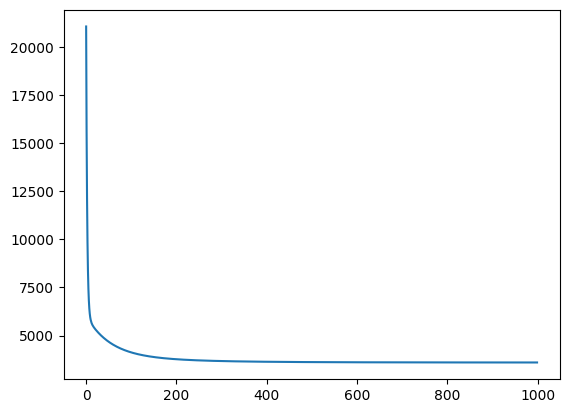

In [160]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [161]:
W, b

(array([-238.32763043,  447.01300287,  299.73496722,  495.21177305,
         151.0867752 ]),
 152.25237476526956)

In [162]:
prediction = model_2(X_test, W, b)
mse = loss_2(X_test, W, b, y_test)
mse # 13%나 커졌네 언더피팅. BMI는 당뇨에 큰 영향이 있음.

3198.309016120499

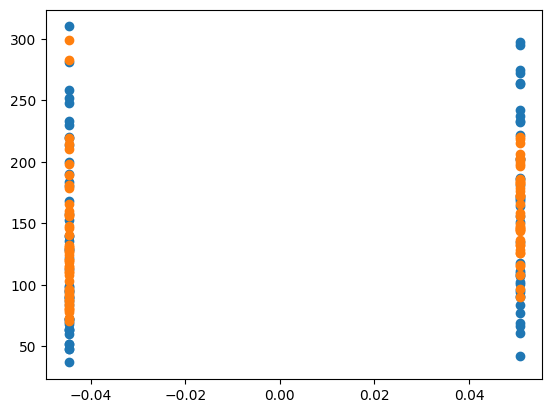

In [163]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show() # 첫번째 컬럼이 sex

##1-10. Summary

|feature|correlation|all|1-9-a|1-9-b|1-9-c|1-9-d|
|--|--|--|--|--|--|--|
|0. age||||X|X|X|
|1. sex|||||X||
|2. bmi|O|||||X|
|3. bp|O||||||
|4. tc||||X|X|X|
|5. ldl||||X|X|X|
|6. hdl|||X|X|X|X|
|7. tch|O||||||
|8. ltg|O||||||
|9. glu|O||||||
|MSE||2878|2878|2819|2908|3198|

- 그래프에서 상관관계가 보였던 bmi, bp, tch, ltg, glu만 포함한 1-9-c보다 sex를 포함한 1-9-b가 더 작은 MSE를 가짐. sex도 상관관계가 있었나봐.. 그래프로 보니 주관적인 판단이 들어갔네.. 숫자로 봐야겠어
- 상관관계가 크게 보였던 bmi를 빼보았더니 MSE가 13%나 증가함. 확실히 상관관계가 있음. 

##1-11. Extra Work

###1-11-1 Add trend line

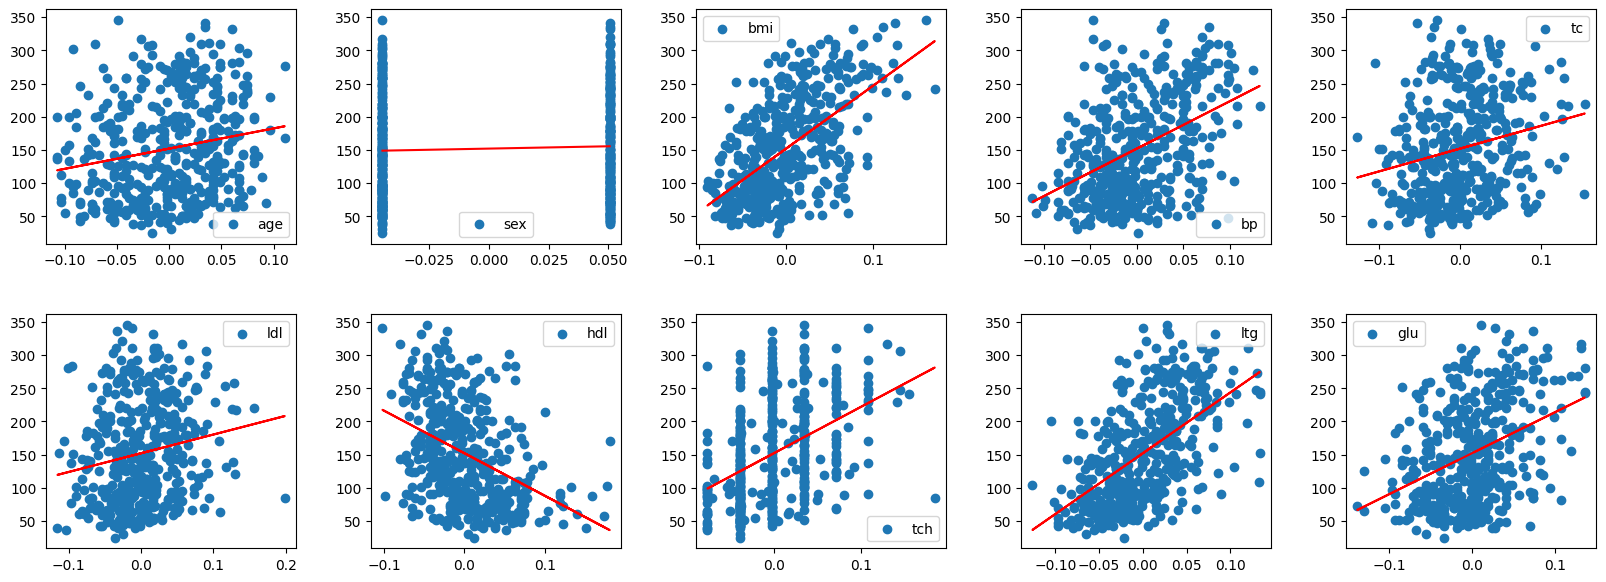

In [164]:
#변수와 타겟 간의 상관 관계를 추세선도 넣고 보자.
#visualization of DATA
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

fig, ax = plt.subplots(2,5)
fig.set_size_inches((20,7))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

j=0
for i in ['age','sex','bmi','bp','tc','ldl','hdl', 'tch','ltg', 'glu']:
    
    plt.subplot(2,5,j+1)
    plt.scatter(df_X[:,j], df_y, label = i)

    #추세선 넣기기
    z = np.polyfit(df_X[:,j], df_y, 1) #1차원
    p = np.poly1d(z) #1차원 다항식 연산 캡슐화
    pylab.plot(df_X[:,j], p(df_X[:,j]), "-r")

    j +=1
    
    plt.legend()
    
plt.show()
#bmi, bp, tch, ltg, glu에서 상관관계가 양의 상관관계가 보임.  그 중 bmi가 가장 큰 상관관계로 보임.
#오잉... sex만 추세선이 누워있고 다 기울기가 있음. 특히, hdl은 상관관계 있는 거 맞음? MSE는 차이가 안났는데... 쩝
#다중공선성 문제인가? 그럼 heat map을 봐야하는 건가?

###1-11-2 Heat Map

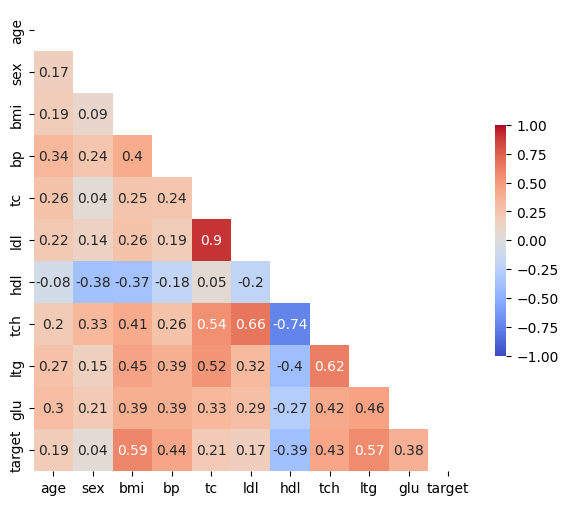

In [201]:
#Heat map
import seaborn as sns

fig, ax = plt.subplots( figsize =(7,6))
df_X_y = np.c_[df_X, df_y] #y값 추가

df_Xy = pd.DataFrame(df_X_y, columns = ['age','sex','bmi','bp','tc','ldl','hdl', 'tch','ltg', 'glu', 'target']) #dataframe으로 만든 후에
df_Xy
cor_tab =df_Xy.corr().apply(np.round, decimals=2)

# Palette
pal = sns.color_palette("coolwarm", 10000)

mask = np.zeros_like(df_Xy.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True    #윗 줄과 함께 그래프 반만 보이기

sns.heatmap(
    data=cor_tab, 
    annot=True, 
    cmap=pal, 
    mask=mask,
    vmin=-1, 
    center=0, 
    vmax=1, 
    cbar_kws={"shrink": .5}
    )
plt.show()

#ldl과 tc에서 큰 상관관계가 보임(0.9). ldl은 나쁜 콜레스테롤 tc는 총 콜레스테롤이므로 상관관계가 있는 게 맞음. 
#둘 중 하나는 빼는 게 맞네.. target과의 관계를 고려하면 ldl을 빼는 것이 맞았음. 1-9-b에서 처럼.
#target과의 상관계수 절대값 0.3을 기준으로 bmi, bp, hdl, tch, ltg, glu를 선택하여 다시 예측해보자

### 1-11-3. Predict with bmi, bp, hdl, tch, ltg, glu
- Split, model, learning, loss, visualization

In [186]:
#7번째 열 빼기
df_X_5 = np.delete(df_X, 5, axis = 1)
df_X_5 = np.delete(df_X_5, 4, axis = 1)
df_X_5 = np.delete(df_X_5, 1, axis = 1)
df_X_5 = np.delete(df_X_5, 0, axis = 1)
df_X_5.shape

(442, 6)

In [187]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(df_X_5, df_y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(353, 6) (353,) (89, 6) (89,)


In [188]:
import numpy as np
W = np.random.rand(6)  #변수 특성값의 개수가 9개이므로 9개를 랜덤으로 정함. 이게 운좋게 잘 정해지면 빠르게 최적 값을 구하는 거 같음. 
b = np.random.rand() 
W, b

(array([0.08844608, 0.80989627, 0.63395902, 0.58924964, 0.39376132,
        0.67430211]),
 0.7515476405079101)

In [189]:
#모델함수 
def model_1(X, W, b):
    predictions = 0
    for i in range(6):
        predictions += X[:, i] * W[i]  #같은 열의 변수와 가중치를 곱해서 계속 더해주고 있음. 시그마(x*w)를 하고 있는 거임. for문이 끝나면 전체 X에 대한 예측값이 한꺼번에 나오는 거임임
    predictions += b  #시그마(x*w) + bias
    # print(predictions.shape) # 442의 예측값이므로 442x1의 행렬이겠지

    return predictions

print('<3')

<3


In [190]:
#Define MSE
def MSE_1(a, b):
    mse = 0
    mse = ((a - b) ** 2).mean()  # return mean(avrage) of a, b == list 
    return mse
print('<3')

#Define loss
def loss_1(X, W, b, y):
    predictions = model_1(X, W, b)
    L = MSE_1(predictions, y)
    return L
print('<3')

<3
<3


In [191]:
#Define gradient function
def gradient_1(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    # print('N : ',N)  #442이겠지

    # y_pred 준비
    y_pred = model_1(X, W, b)
        
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)    #https://coding-grandpa.tistory.com/33 T : 행열을 바꿔주는 함수, dot : 두 행렬을 곱하는 함수
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

print('<3')

<3


In [192]:
dW, db = gradient_1(df_X, W, b, df_y)
print("dW:", dW)
print("db:", db)

dW: [-1.37279952 -0.31032632 -4.29052522 -3.2282936  -1.54707365 -1.26854028
  2.88860427 -3.14716493 -4.14054141 -2.79740675]
db: -302.76387304477606


In [193]:
LEARNING_RATE = 0.9 #1부터 0.0001까지 해봄.

In [194]:
#손실함수
losses = []

for i in range(1, 1001):
    dW, db = gradient_1(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss_1(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))  

Iteration 10 : Loss 5739.2593
Iteration 20 : Loss 5005.0158
Iteration 30 : Loss 4635.0413
Iteration 40 : Loss 4346.4014
Iteration 50 : Loss 4118.8453
Iteration 60 : Loss 3938.9238
Iteration 70 : Loss 3796.1990
Iteration 80 : Loss 3682.5475
Iteration 90 : Loss 3591.6454
Iteration 100 : Loss 3518.5679
Iteration 110 : Loss 3459.4783
Iteration 120 : Loss 3411.3862
Iteration 130 : Loss 3371.9595
Iteration 140 : Loss 3339.3783
Iteration 150 : Loss 3312.2211
Iteration 160 : Loss 3289.3770
Iteration 170 : Loss 3269.9763
Iteration 180 : Loss 3253.3377
Iteration 190 : Loss 3238.9263
Iteration 200 : Loss 3226.3216
Iteration 210 : Loss 3215.1921
Iteration 220 : Loss 3205.2763
Iteration 230 : Loss 3196.3665
Iteration 240 : Loss 3188.2980
Iteration 250 : Loss 3180.9391
Iteration 260 : Loss 3174.1842
Iteration 270 : Loss 3167.9484
Iteration 280 : Loss 3162.1628
Iteration 290 : Loss 3156.7711
Iteration 300 : Loss 3151.7273
Iteration 310 : Loss 3146.9930
Iteration 320 : Loss 3142.5365
Iteration 330 : L

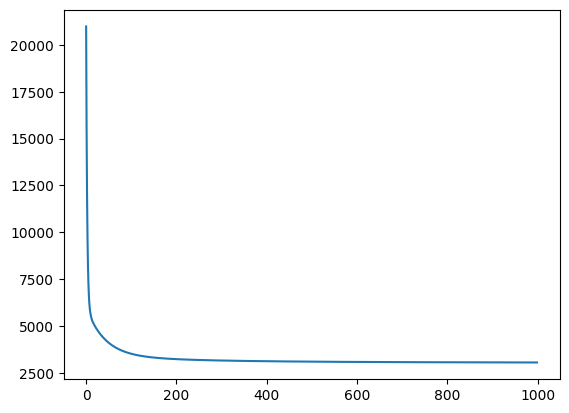

In [195]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [196]:
W, b

(array([ 572.40135562,  306.28069922, -220.19422455,  -16.35811785,
         406.67305659,   52.8468463 ]),
 151.5758052332056)

In [197]:
prediction = model_1(X_test, W, b)
mse = loss_1(X_test, W, b, y_test)
mse # 최소값보다 크네... 실패

2921.319302505287

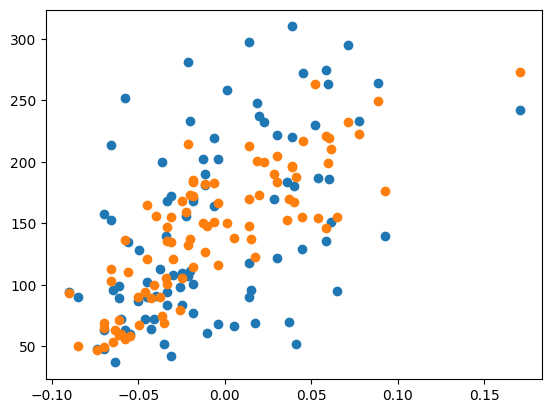

In [199]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show() # 첫번째 컬럼은 bmi

### 1-11-4. Predict with bmi, ltg
- Split, model, learning, loss, visualization
_ 0.5 이상인 거만 선택 

In [202]:
#7번째 열 빼기
df_X_5 = np.delete(df_X_5, 5, axis = 1)
df_X_5 = np.delete(df_X_5, 3, axis = 1)
df_X_5 = np.delete(df_X_5, 2, axis = 1)
df_X_5 = np.delete(df_X_5, 1, axis = 1)
df_X_5.shape

(442, 2)

In [203]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(df_X_5, df_y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(353, 2) (353,) (89, 2) (89,)


In [204]:
import numpy as np
W = np.random.rand(2)  #변수 특성값의 개수가 9개이므로 9개를 랜덤으로 정함. 이게 운좋게 잘 정해지면 빠르게 최적 값을 구하는 거 같음. 
b = np.random.rand() 
W, b

(array([0.83197671, 0.28351905]), 0.47930810760567955)

In [205]:
#모델함수 
def model_1(X, W, b):
    predictions = 0
    for i in range(2):
        predictions += X[:, i] * W[i]  #같은 열의 변수와 가중치를 곱해서 계속 더해주고 있음. 시그마(x*w)를 하고 있는 거임. for문이 끝나면 전체 X에 대한 예측값이 한꺼번에 나오는 거임임
    predictions += b  #시그마(x*w) + bias
    # print(predictions.shape) # 442의 예측값이므로 442x1의 행렬이겠지

    return predictions

print('<3')

<3


In [206]:
#Define MSE
def MSE_1(a, b):
    mse = 0
    mse = ((a - b) ** 2).mean()  # return mean(avrage) of a, b == list 
    return mse
print('<3')

#Define loss
def loss_1(X, W, b, y):
    predictions = model_1(X, W, b)
    L = MSE_1(predictions, y)
    return L
print('<3')

<3
<3


In [207]:
#Define gradient function
def gradient_1(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    # print('N : ',N)  #442이겠지

    # y_pred 준비
    y_pred = model_1(X, W, b)
        
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)    #https://coding-grandpa.tistory.com/33 T : 행열을 바꿔주는 함수, dot : 두 행렬을 곱하는 함수
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

print('<3')

<3


In [208]:
dW, db = gradient_1(df_X, W, b, df_y)
print("dW:", dW)
print("db:", db)

dW: [-1.37240652 -0.31351716 -4.29527728 -3.23253783 -1.55216328 -1.27403506
  2.89129073 -3.15212343 -4.1442063  -2.80051031]
db: -303.30835211058053


In [209]:
LEARNING_RATE = 0.9 #1부터 0.0001까지 해봄.

In [210]:
#손실함수
losses = []

for i in range(1, 1001):
    dW, db = gradient_1(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss_1(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))  

Iteration 10 : Loss 6028.7937
Iteration 20 : Loss 5484.4610
Iteration 30 : Loss 5235.8959
Iteration 40 : Loss 5017.9908
Iteration 50 : Loss 4824.6201
Iteration 60 : Loss 4652.9904
Iteration 70 : Loss 4500.6533
Iteration 80 : Loss 4365.4367
Iteration 90 : Loss 4245.4133
Iteration 100 : Loss 4138.8726
Iteration 110 : Loss 4044.2971
Iteration 120 : Loss 3960.3402
Iteration 130 : Loss 3885.8068
Iteration 140 : Loss 3819.6365
Iteration 150 : Loss 3760.8884
Iteration 160 : Loss 3708.7275
Iteration 170 : Loss 3662.4129
Iteration 180 : Loss 3621.2871
Iteration 190 : Loss 3584.7667
Iteration 200 : Loss 3552.3338
Iteration 210 : Loss 3523.5290
Iteration 220 : Loss 3497.9445
Iteration 230 : Loss 3475.2186
Iteration 240 : Loss 3455.0302
Iteration 250 : Loss 3437.0942
Iteration 260 : Loss 3421.1578
Iteration 270 : Loss 3406.9966
Iteration 280 : Loss 3394.4114
Iteration 290 : Loss 3383.2254
Iteration 300 : Loss 3373.2817
Iteration 310 : Loss 3364.4411
Iteration 320 : Loss 3356.5801
Iteration 330 : L

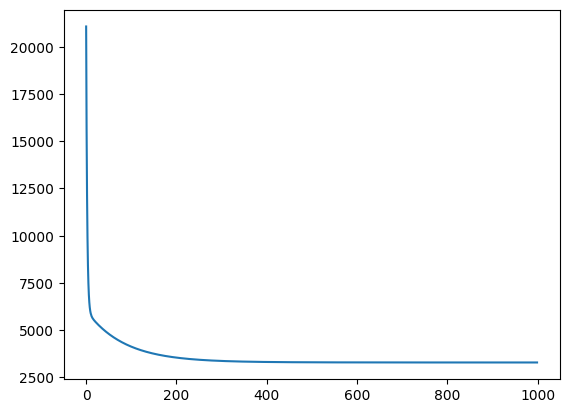

In [211]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [212]:
W, b

(array([719.67042478, 571.13108114]), 151.79293584254182)

In [213]:
prediction = model_1(X_test, W, b)
mse = loss_1(X_test, W, b, y_test)
mse # 최소값보다 크네... 피쳐 2개만 선택했는데 최소값과 2% 차이 효율면에서 나쁘지 않음? 기준을 모르겠음. 

2887.3358524222035

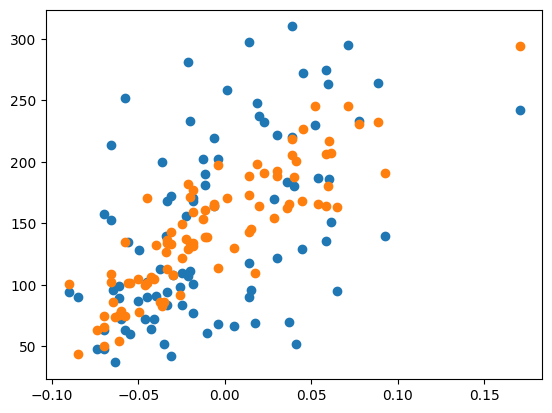

In [214]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show() # 첫번째 컬럼은 bmi

## Review
- 당뇨 수치에 큰 영향이 있다는 bmi와 ltg라는 데 ltg는 무슨 약어인지 찾아봐도 잘 모르겠음. 
- heat map을 통해 알아본 target과의 상관관계만 따져 학습을 해도 모델 평가가 가장 좋을 수는 없다는 걸 알아버림.
- 객관적인 지표로 feature를 선택하면 편하고 좋을텐데 어떤 지표를 보아야 할까?
- 이번 과제의 목표는 loss fuction과 learning rate를 아는 것인데 샛길로 많이 빠졌음. 

# Project 2 : Bike rider at Monday 3p.m.

- 데이터셋의 주제는 시간, 온도, 습도, 계절 등의 정보가 담긴 데이터를 통해 자전거의 대여량을 예측하는 문제입니다.
자전거 대여량을 결정하는 데에는 시간도 중요할 것이고, 요일이나 계절도 크게 영향을 미칠 것 같습니다.

- 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?  
(1) 데이터 가져오기  https://www.kaggle.com/c/bike-sharing-demand/data  
(2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기  
(3) year, month, day, hour, minute, second 데이터 개수 시각화하기  
(4) X, y 컬럼 선택 및 train/test 데이터 분리  
(5) LinearRegression 모델 학습  
(6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산  
(7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기  

In [ ]:
#import library
import pandas as pd
import numpy as np

##2-1. Load dataset

In [ ]:
#구글 드라이브 파일 접근 코랩에서 진행할 때..
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터 호출하기

# google drive 
path = '/content/drive/MyDrive/Colab Notebooks/aiffel/data/bike/'

train = pd.read_csv(path+'train.csv')
test = pd.read_csv(path+'test.csv')
y_test = pd.read_csv(path+'sampleSubmission.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Data Fields
- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

##2-2. datetime preprocessing
- datetime 자료형으로 변환하고 연,월,일,시,분,초 6가지 컬럼 생성

In [ ]:
#datetime 타입 확인인
train.info() #datetime이 object이군

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
#datetime 자료형으로 변환 및 확인인
train['datetime']=pd.to_datetime(train['datetime'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:
#연,월,일,시,분,초 6가지 컬럼 생성 
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas.to_datetime

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train['weekday'] = train['datetime'].dt.weekday #월요일 3시를 예측하니깐 필요할 거 같아 추가 사용할 일이 있을까 함. 0이 월요일일
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


##2-3. Visualization of year, month, dat, hour, minute, second

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

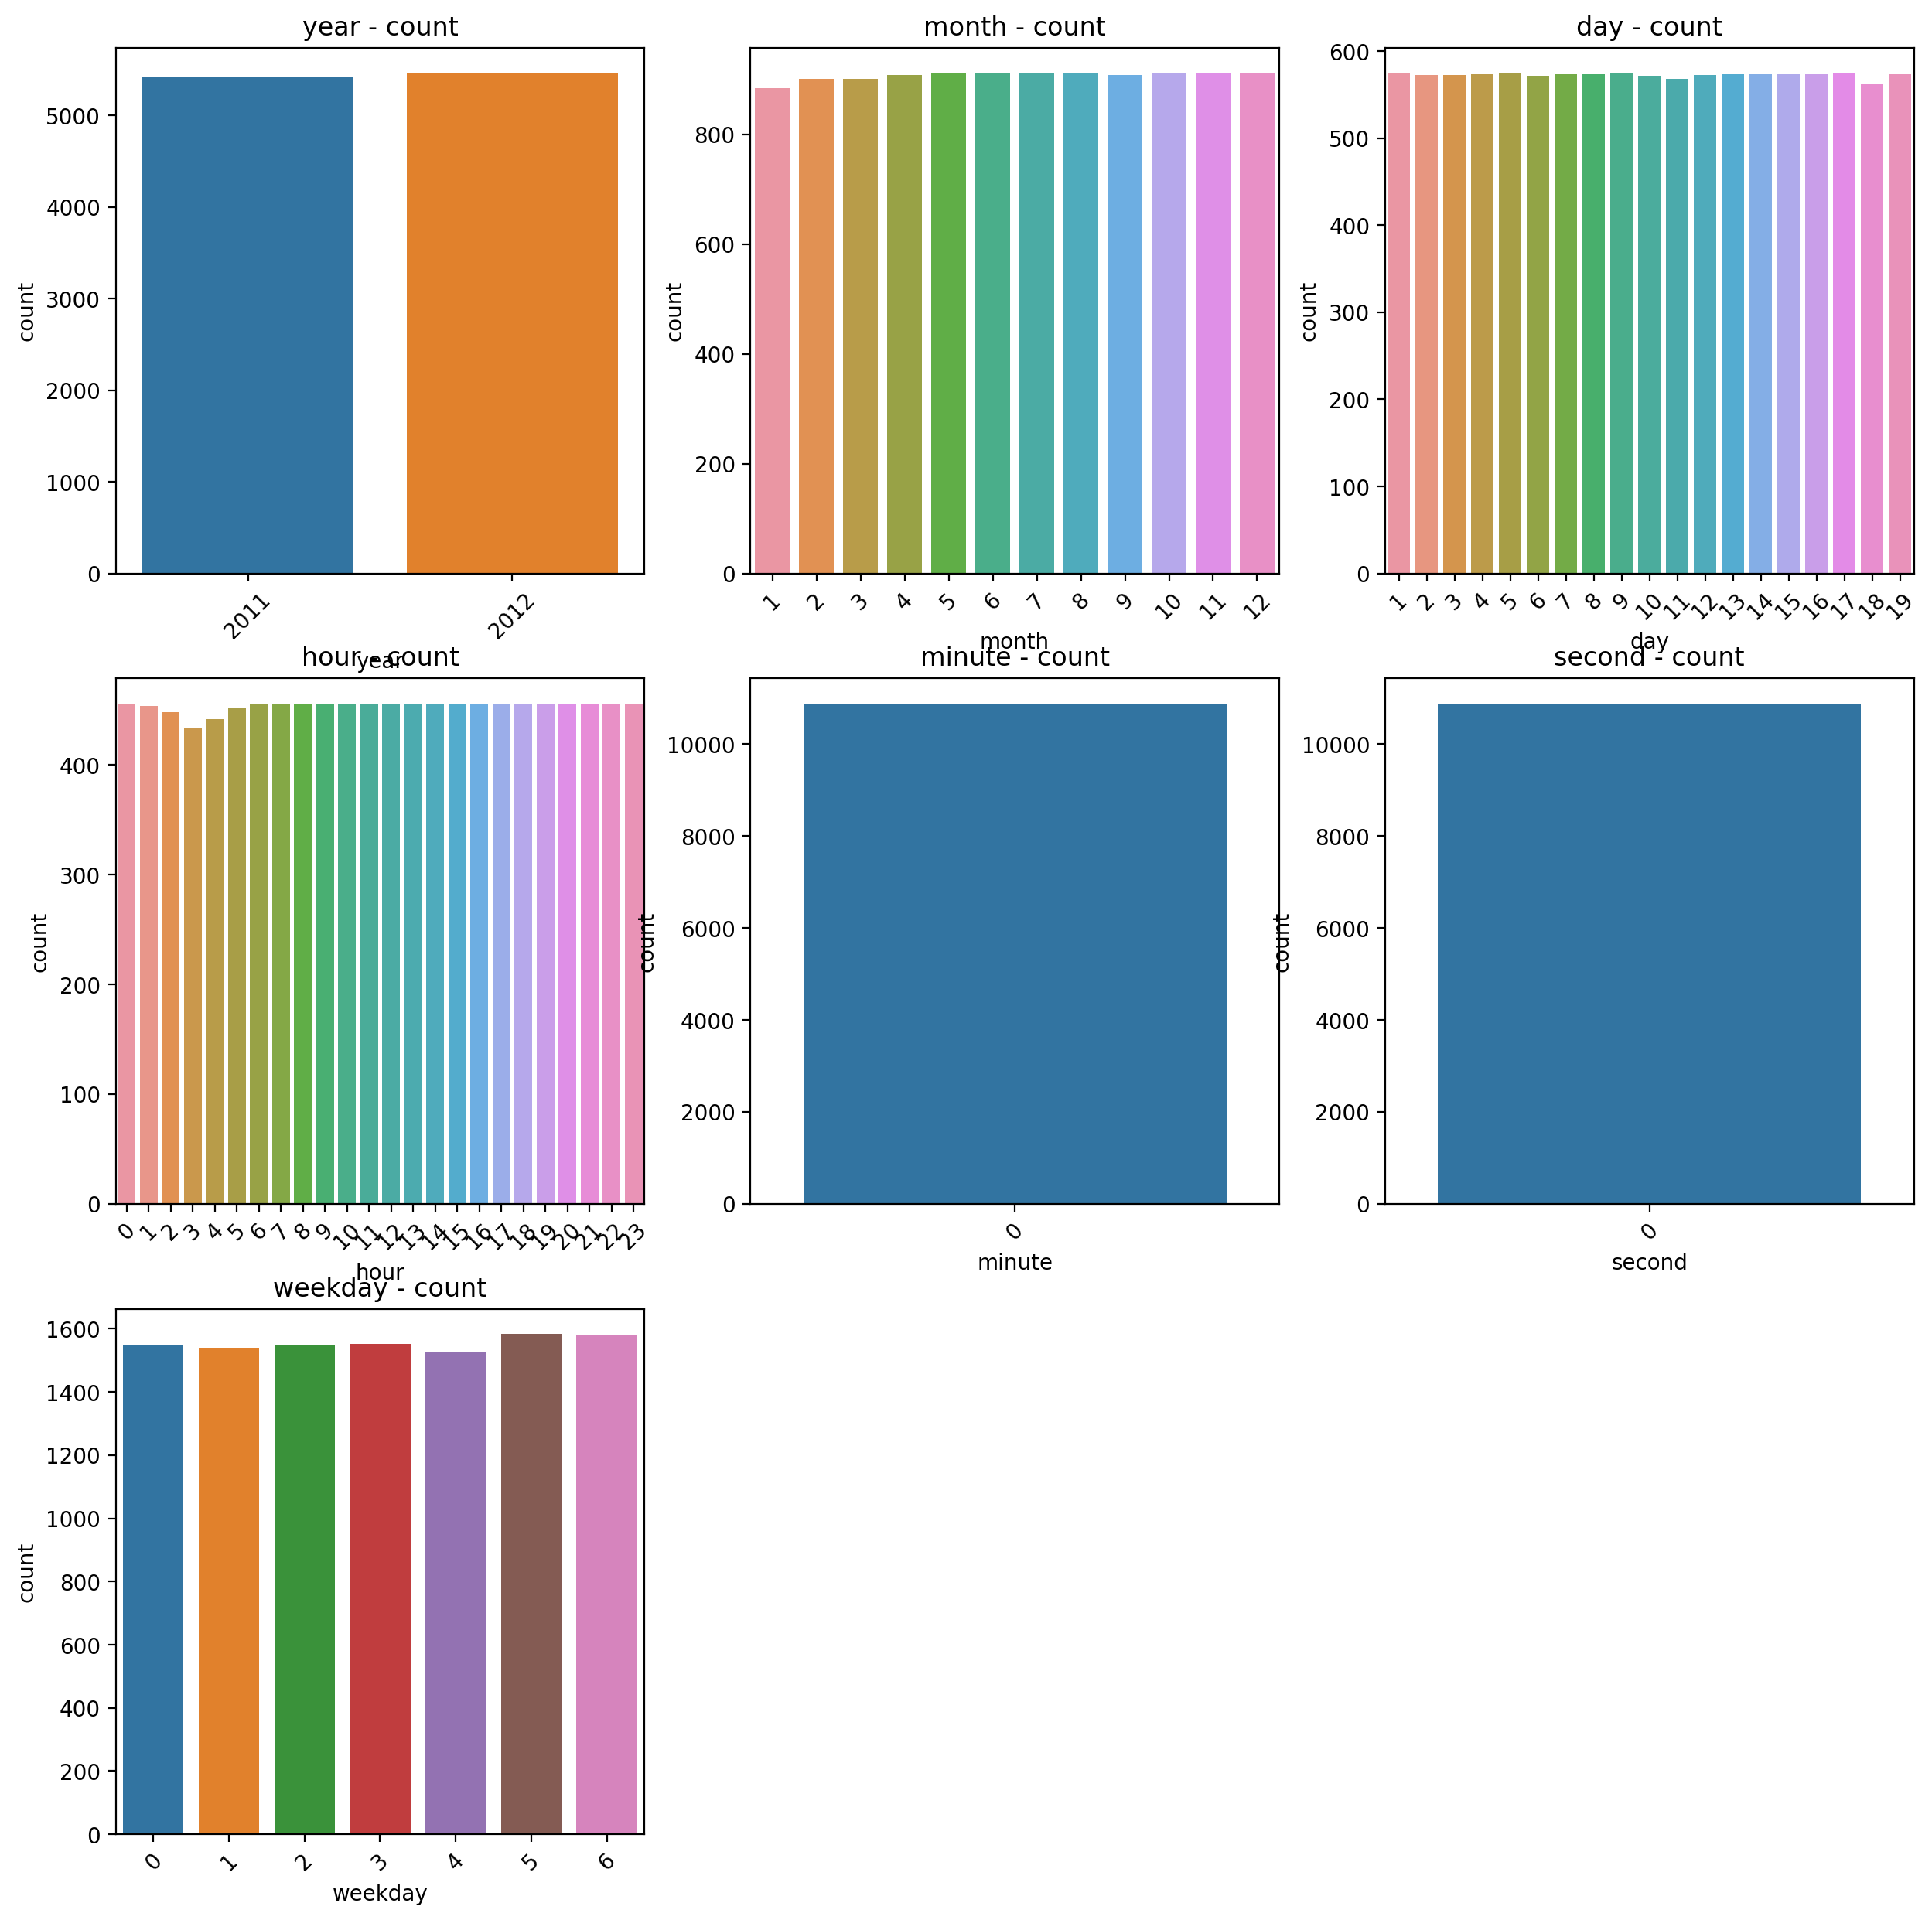

In [ ]:
# sns.countplot 활용해서 시각화하기
# subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기
plt.figure(figsize=(15, 15))
j=1
for i in ['year', 'month', 'day', 'hour', 'minute', 'second', 'weekday']:
    plt.subplot(3, 3, j)
    plt.title(f"{i} - count")
    sns.countplot(data=train, x=train[i])
    plt.xticks(rotation=45)
    j +=1

plt.show() # 매우 고르게 분포

In [ ]:
train['hour'].value_counts()

12    456
13    456
22    456
21    456
20    456
19    456
18    456
17    456
16    456
15    456
14    456
23    456
11    455
10    455
9     455
8     455
7     455
6     455
0     455
1     454
5     452
2     448
4     442
3     433
Name: hour, dtype: int64

##2-4. Split
- X, y 컬럼 선택 및 train/test 데이터 분리
    - 자전거 타는 데 변수 휴일인지 비나 눈이 오는지 너무 춥거나 덥지 않은지..
    - X : season, workingday, weather, atemp(체감온도), windspeed, month, hour => RMSE가 150이상이 나왔음.
    - 'workingday', 'temp','humidity','month', 'day', 'hour'=> RMSE 147, day에 상관없을 거 같았는데 day 넣으니 아주아주 약간 떨어짐.
    - y : count

In [ ]:
#선택한 컬럼만 모으기
# X = train[['season', 'workingday', 'weather', 'atemp', 'windspeed', 'month', 'hour']]
y = train['count']
X = train[['temp','humidity','month', 'day', 'hour']] #계절, 휴일을 넣어도 빼도 RMSE 값이 크게 바뀌지 않음. 그렇다면 변수가 적은 것이 나음.(오컴의 면도날날)
X.shape, y.shape

((10886, 5), (10886,))

In [ ]:
#split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(8708, 5) (8708,) (2178, 5) (2178,)


##2-5. LinearRegression 

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

##2-6. prediction, MSE & RMSE

In [ ]:
from sklearn.metrics import mean_squared_error
pred = model.predict(X_test)
print('MSE : ', mean_squared_error(y_test, pred))
print('RMSE : ',mean_squared_error(y_test, pred)**0.5) 

MSE :  21666.419654678633
RMSE :  147.19517537840238


##2-7. Visualization of count by temp & humidity

In [ ]:
X_test.head()

,temp,humidity,month,day,hour
3133,33.62,59,7,19,11
5786,4.10,54,1,16,6
5224,9.84,48,12,11,18
8953,29.52,62,8,15,10
8054,25.42,53,6,15,23


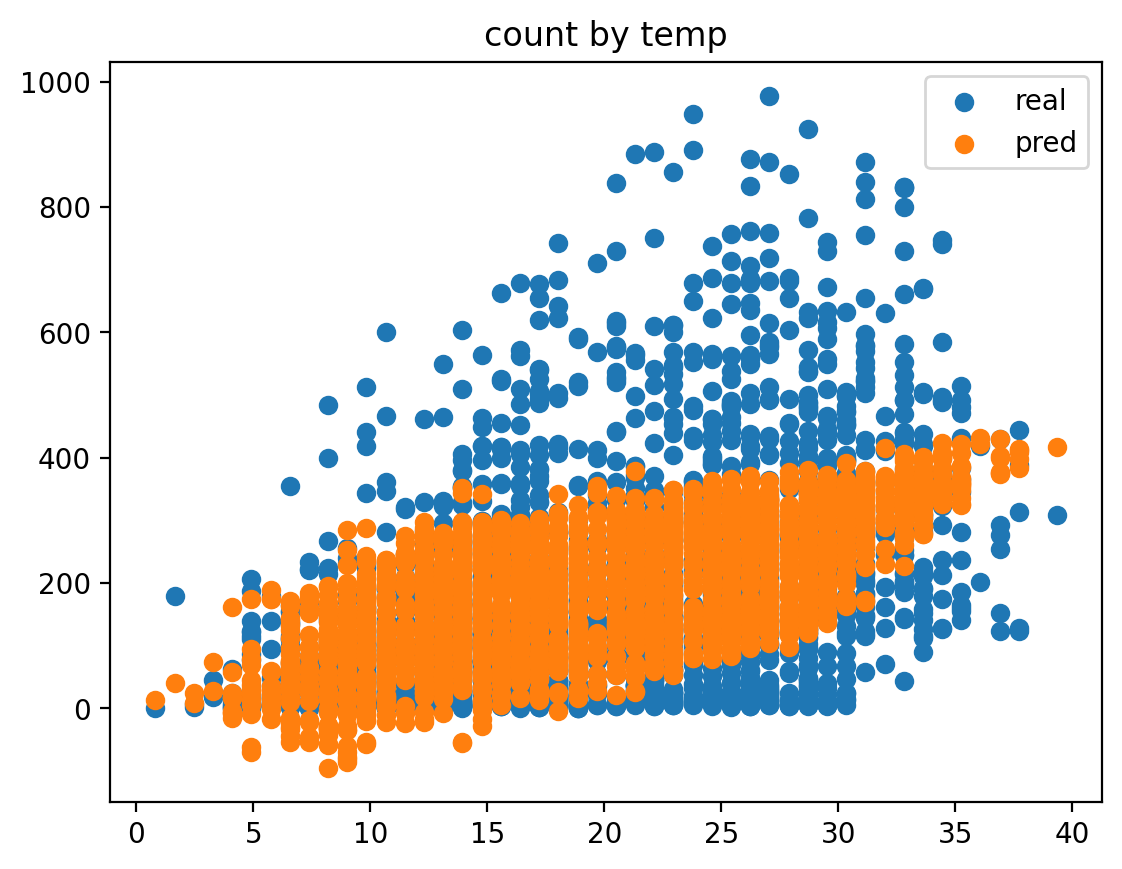

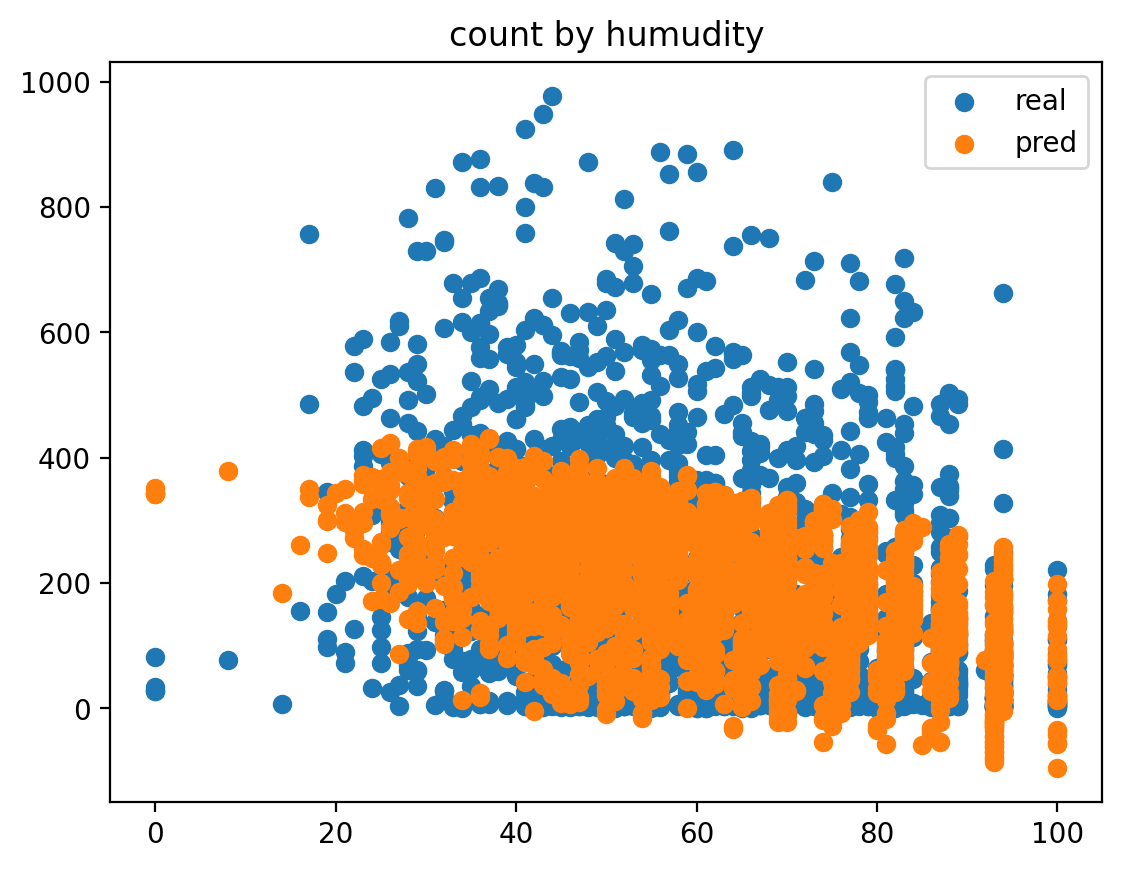

In [ ]:
plt.scatter(X_test.iloc[:,0], y_test, label='real')
plt.scatter(X_test.iloc[:,0], pred, label='pred')
plt.title('count by temp')
plt.legend()

plt.show()

plt.scatter(X_test.iloc[:,1], y_test, label='real')
plt.scatter(X_test.iloc[:,1], pred, label='pred')
plt.title('count by humudity')
plt.legend()

plt.show()


# Review
그저 하라는 것만 하고 끝난 느낌...  
회귀 분석에서 model & loss의 알고리즘을 확실히..  
학습률 개념을 알 수 있다. 

